# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.
The reason of using ML in this problem is defined；
The business problem is defined successfully
Type of ML problem is defined



So what can be done as a passenger to avoid delayed flights? is it possible to know if your flight will be delayed before it comes up on the departure boards? or before you being inside the plane? The answer to these questions is maybe. By using Machine Learning (ML) Algorithms you can try to predict if your flight will be delayed in many ways. Of course, all of these different algorithms will have pitfalls and a certain degree of accuracy which will be associated to the data that they are fed.




As more people choose to travel by plane, the number of flights that fail to take off on time rises. This expansion exacerbates the overcrowding at airports and causes financial difficulties in the airline industry. Air transportation delays indicate that the aviation system is inefficient. It comes at a high cost for both airlines and passengers.
According to the Total Delay Impact Study, the total cost of air transportation delays to air travellers and the airline industry in the United States in 2007 was $32.9 billion, resulting in a $4 billion reduction in GDP. As a result, forecasting flight delays can improve airline operations and passenger satisfaction, resulting in a positive economic impact.

Machine learning refers to algorithms that allow a computer to analyse data, identify potential patterns, and then use them to predict.

### 2. Formulate the business problem, success metrics, and desired ML output.


The confusion matrix can be used to calculate the classifier's performance. When compared to the actual result, the classifier results can generate four values:
    True Positive (TP): the predicted value is positive; the actual value is positive.
    True Negative (TN): the predicted value is negative; the actual value is negative.
    False Positive (FP): the predicted value is positive; the actual value is negative.
    False Negative (FN): the predicted value is negative; the actual value is positive.

The performance of selected algorithms was assessed using four metrics: accuracy, precision, recall, and F1 score. All of these metrics are related to algorithm quality in a positive way. As a result, the higher the values of these measures are for a specific algorithm, the better its performance.

The desired output is like following:


### 3. Identify the type of ML problem you’re dealing with.

This also implies that this will be a binary classification problem where a “0” means that the flight arrives on time, and “1” that the flight will be delayed. This takes us to the next question, is the dataset balanced?

To make a better comparison, seven models were evaluated in this study based on their prediction performance. Furthermore, this study used binary classification rather than numerical classification to better clarify whether or not a flight was delayed.

A supervised machine learning approach was used in this study. The data set contains a target variable, and the goal is frequently to teach the computer a previously created classification system. The primary goal of this research is to predict flight delays using label data. As a result, a supervised learning classification algorithm was chosen as the best fit.


According to the variable "IS DELAY," the data set contains 3873 delayed flights and 24945 non-delayed flights, indicating an imbalanced distribution because the majority of flights were not delayed. This issue was solved using 10-fold cross-validation. It generated the training and testing sets. On the testing set, each algorithm was run with the scikit-learn python package's default parameters, and all algorithms used the same training set.


### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
exit()

In [1]:
import importlib.util
import sys
import pip

# For illustrative purposes.
names = ['zipfile','pathlib2','pandas','numpy','subprocess','matplotlib','seaborn','warnings','glob','dask','sklearn']

for name in names:
    if name in sys.modules:
        print(f"{name!r} already in sys.modules")
    elif (spec := importlib.util.find_spec(name)) is not None:
        # If you choose to perform the actual import ...
        module = importlib.util.module_from_spec(spec)
        sys.modules[name] = module
        spec.loader.exec_module(module)
        print(f"{name!r} has been imported")
    else:
        print(f"can't find the {name!r} module")
        pip.main(['install', name])
    

'zipfile' already in sys.modules
'pathlib2' has been imported
'pandas' has been imported
'numpy' already in sys.modules
'subprocess' already in sys.modules
'matplotlib' has been imported
'seaborn' has been imported
'warnings' already in sys.modules
'glob' already in sys.modules
'dask' has been imported
'sklearn' has been imported


In [2]:
import os
from pathlib2 import Path
import zipfile
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import glob

                                                


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [4]:
os.getcwd()         

'C:\\Users\\Melissa\\OneDrive - University of Canberra\\Data Science Technology and Systems PG (11523)\\ASGN-11523\\Final_Project'

In [5]:
# let us see what data available in our data directory
for direname, _ , filenames in os.walk('data_compressed'):
    for filename in filenames:
        print(os.path.join(direname, filename))

data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_P

In [6]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'data_compressed'
base_path = 'Final_Project'
csv_base_path = 'data_extracted'

!mkdir data_extracted

A subdirectory or file data_extracted already exists.


In [7]:
# How many zip files do we have? write a code to answer it.
# let us see what data available in our data directory
count = 0
for direname, _ , filenames in os.walk("data_compressed"):
    for filename in filenames:
        count += 1
        print(os.path.join(direname, filename))

print('file count:', count)

data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip
data_compressed\On_Time_Reporting_Carrier_On_Time_P

#### Extract CSV files from ZIP files

In [8]:
os.getcwd()


'C:\\Users\\Melissa\\OneDrive - University of Canberra\\Data Science Technology and Systems PG (11523)\\ASGN-11523\\Final_Project'

In [9]:
# upzip all the compressed files
for path, dir_list, file_list in os.walk('data_compressed'):
    for file_name in file_list:
#         print('file_name:',file_name)
        if file_name.endswith(".zip"):
            abs_file_path = os.path.join(path, file_name)

            zip_obj = zipfile.ZipFile(abs_file_path, 'r')
#             zip_obj.extractall(output_path)
            zip_obj.extractall(csv_base_path)
            zip_obj.close()
        
#             print('zip_obj:',zip_obj)
            
#  NEED BECOME A FUNCTION

In [10]:
# How many csv files have we extracted? write a code to answer it.
count = 0
for path, dir_list, file_list in os.walk(csv_base_path):
    for file_name in file_list:
#         print('file_name:',file_name)
        if file_name.endswith(".csv"):
            count += 1
print(count)

60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [11]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [12]:
df_temp = pd.read_csv("data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

**Question**: Print the row and column length in the dataset, and print the column names.

In [13]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [14]:
df_temp.head(10)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   
5                     20363                          9E      N316PQ  ...   
6                     20363                          9E      N916XJ  ...   
7                     20363                          9E      N371CA  ...   
8                     20363                          9E      N601LR  ...   
9                     20363                          9E      N906XJ  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   
5          NaN          NaN            NaN               NaN          NaN   
6          NaN          NaN            NaN               NaN          NaN   
7          NaN          NaN            NaN               NaN          NaN   
8          NaN          NaN            NaN               NaN          NaN   
9          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  
5            NaN              NaN            NaN         NaN           NaN  
6            NaN              NaN            NaN         NaN           NaN  
7            NaN              NaN            NaN         NaN           NaN  
8            NaN              NaN            NaN         NaN           NaN  
9            NaN              NaN            NaN         NaN           NaN  

[10 rows x 110 columns]

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [15]:
print(f'The column names are :')
print('#########')
# for col in df_temp.columns:# 
#     print(col)
    
list(df_temp.columns)

The column names are :
#########


['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'DOT_ID_Reporting_Airline',
 'IATA_CODE_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityD

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [16]:
Del_cols = [col for col in df_temp.columns if 'Del' in col]
# print(list(Del_cols.columns))
print(Del_cols)


# df2 = df_temp.filter(regex='Del')
# print(df2)


['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [17]:
# to answer above questions, following code are provided

In [18]:
print("The #rows and #columns are ", len(df_temp) , " and ", len(df_temp.columns))
print("The years in this dataset are: ", df_temp['Year'].unique().tolist())

print("The months covered in this dataset are: ", df_temp['Month'].unique().tolist())
print("The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique().tolist()))

print("The Origin airports covered are: ", list(df_temp['OriginAirportID'].unique().tolist()))
print("The Destination airports covered are: ", list(df_temp['DestAirportID'].unique().tolist()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  [11298, 12953, 13485, 13487, 10397, 10529, 15607, 12478, 14492, 10994, 11433, 11977, 14307, 14814, 11721, 14122, 14524, 14633, 14635, 11193, 12992, 13930, 12451, 15323, 10721, 11203, 11278, 10990, 10434, 12339, 11986, 10781, 13244, 15370, 11042, 15016, 10785, 13871, 13277, 15380, 14685, 11996, 11618, 13795, 10693, 13198, 15249, 14576, 12945, 14321, 10792, 10208, 11057, 11995, 10821, 14683, 14100, 15412, 10154, 11423, 11953, 10431, 10581, 13296, 12323, 13433, 12266, 14696, 15096, 13931, 13342, 15919, 13495, 14027, 10135, 12197, 11612, 10257, 13029, 10423, 14098, 10980, 12007, 10685, 10731, 11003, 10874, 10408, 10146, 10868, 1498

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [19]:
counts = pd.DataFrame({'Origin':df_temp['OriginAirportID'].value_counts(), 
                       'Destination':df_temp['DestAirportID'].value_counts()})
counts

Origin  Destination
10135     303          303
10136     169          169
10140    2077         2076
10141      60           60
10146      79           79
...       ...          ...
15841      60           60
15897      52           52
15919    1004         1004
15991      60           60
16218      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [20]:
counts.sort_values(by=['Origin'],ascending=False).head(15 )# Enter your code here

Origin  Destination
10397   31525        31521
13930   28257        28250
11298   22802        22795
11292   19807        19807
11057   19655        19654
12892   17875        17873
14771   14332        14348
12266   14210        14203
12953   13850        13850
13487   13349        13347
12889   13318        13322
14107   13126        13128
11433   12725        12724
10721   12223        12227
14747   11872        11877

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?


The information we can take from datset is the basic information about airport and airline. There is no way to for us to predict if the airline would be delayed or not.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [21]:
os.walk('data_extracted')

<generator object _walk at 0x00000172DA6FCBA0>

In [22]:
file_path = '.\data_extracted'
csv_files = os.listdir(file_path)
# cwd = os.path.abspath(file_path)
# cwd
# #list all the files from the directory
# csv_files = os.listdir(file_path)
# csv_files

#list all csv files only
list(filter(lambda f: f.endswith('.csv'), csv_files))

['On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_7.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_8.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_9.csv',
 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2015_1.csv',
 'On_Time

In [23]:
subset_cols = ['Origin', 'Dest', 'Reporting_Airline']
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

df_filter = df_temp[cols]
df_filter

# filetered_rows = df_filter[df_filter[subset_cols].isin(subset_vals)]

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2018        3      9           3          1  2018-09-03   
1       2018        3      9           9          7  2018-09-09   
2       2018        3      9          10          1  2018-09-10   
3       2018        3      9          13          4  2018-09-13   
4       2018        3      9          14          5  2018-09-14   
...      ...      ...    ...         ...        ...         ...   
585744  2018        3      9          11          2  2018-09-11   
585745  2018        3      9          11          2  2018-09-11   
585746  2018        3      9          11          2  2018-09-11   
585747  2018        3      9          11          2  2018-09-11   
585748  2018        3      9          11          2  2018-09-11   

       Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
0                     9E    DFW          TX  CVG        KY        1315   
1                     9E    DFW          TX  CVG        KY        1315   
2                     9E    DFW          TX  CVG        KY        1315   
3                     9E    DFW          TX  CVG        KY        1315   
4                     9E    DFW          TX  CVG        KY        1315   
...                  ...    ...         ...  ...       ...         ...   
585744                WN    HOU          TX  CLT        NC        1045   
585745                WN    HOU          TX  CRP        TX        1245   
585746                WN    HOU          TX  CRP        TX        1555   
585747                WN    HOU          TX  CRP        TX        1935   
585748                WN    HOU          TX  CRP        TX         810   

        Cancelled  Diverted  Distance  DistanceGroup  ArrDelay  \
0             0.0       0.0     812.0              4       2.0   
1             0.0       0.0     812.0              4     -15.0   
2             0.0       0.0     812.0              4     -11.0   
3             0.0       0.0     812.0              4     -12.0   
4             0.0       0.0     812.0              4     -10.0   
...           ...       ...       ...            ...       ...   
585744        0.0       0.0     920.0              4      -4.0   
585745        0.0       0.0     187.0              1     -15.0   
585746        0.0       0.0     187.0              1       5.0   
585747        0.0       0.0     187.0              1      -1.0   
585748        0.0       0.0     187.0              1       7.0   

        ArrDelayMinutes  ArrDel15  AirTime  
0                   2.0       0.0    108.0  
1                   0.0       0.0    102.0  
2                   0.0       0.0    104.0  
3                   0.0       0.0    106.0  
4                   0.0       0.0    108.0  
...                 ...       ...      ...  
585744              0.0       0.0    123.0  
585745              0.0       0.0     35.0  
585746              5.0       0.0     35.0  
585747              0.0       0.0     35.0  
585748              7.0       0.0     39.0  

[585749 rows x 20 columns]

In [24]:
for x in range(len(subset_cols)):
    df_filter = df_filter[df_filter[subset_cols[x]].isin(subset_vals[x])]


print(df_filter[subset_cols[0]].unique().tolist())    
print(df_filter[subset_cols[0]].unique().tolist() == subset_vals[0])
print(subset_vals[0])
print(df_filter[subset_cols[1]].unique())
print(df_filter[subset_cols[2]].unique())


['LAX', 'PHX', 'SFO', 'ATL', 'DEN', 'DFW', 'IAH', 'ORD', 'CLT']
False
['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO']
['ATL' 'DEN' 'PHX' 'SFO' 'LAX' 'ORD' 'DFW' 'IAH' 'CLT']
['WN' 'AA' 'DL' 'UA' 'OO']


In [25]:
df_filter.shape

(27860, 20)

In [26]:
# prepare to combine the csv files
# first is to check if all the csv files in the path

filepaths = [f for f in os.listdir("data_extracted") if f.endswith('.csv')]

len(filepaths)

60

In [27]:
# First to Test several files to see if my script functional.
dfOut1 = []

for file in glob.glob('data_extracted1/*.csv'):
    tmp1 = pd.read_csv(file, encoding='latin-1')
    tmp1 = tmp1[cols]
    
    for x in range(len(subset_cols)):
        tmp = tmp1[tmp1[subset_cols[x]].isin(subset_vals[x])]
        dfOut1.append(tmp)
        
df1 = pd.concat(dfOut1)
start = time.time()

combined_csv_filename = f"{base_path}df1.csv"

# < write code to call the combined_csv function>

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 0.0 minutes


In [28]:
# # First to Test several files to see if my script functional.
start = time.time()

df = pd.DataFrame([])

df_append = []
all_files = glob.glob('data_extracted1/*.csv')
for file in all_files:

        tmp = pd.read_csv(file)

#     df_append.append(tmp1)
df = pd.concat([df, tmp1])
df_append = df[cols]   

for x in range(len(subset_cols)):
    df_append = df_append[df_append[subset_cols[x]].isin(subset_vals[x])]


print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

# Exporting the file to your directory.
df_append.to_csv('df_append.csv') 

df_append = pd.read_csv('df_append.csv',index_col=[0])
df_append.shape

csv's merged in 0.28 minutes


(27993, 20)

The reson why I am not using function to combine many csv files to a sigle file is because it occupied my full memory and finally laptop stuck. 

In [29]:
# combine all the .csv files.
# first to read all the csv files to directory

import glob
from dask import dataframe as dd

all_files = glob.glob(os.path.join('data_extracted/*.csv'))
file_list = []
for f in all_files:
    print(f)
    variable_name = os.path.splitext(os.path.basename(f))[0]
    file_list.append(variable_name)
    globals()[variable_name] = dd.read_csv(f,dtype={'ArrTime': 'float64',
       'ArrivalDelayGroups': 'float64',
       'CancellationCode': 'object',
       'DepTime': 'float64',
       'DepartureDelayGroups': 'float64',
       'Div1Airport': 'object',
       'Div1TailNum': 'object','Div2TailNum': 'object',                                          
       'Div2Airport': 'object',
       'WheelsOff': 'float64',
       'DivAirportLandings': 'float64',                                               
       'WheelsOn': 'float64','Div3Airport': 'object'})

data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_7.csv
data_extracted\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_8.csv
data_extracted\On_Time_Reporting_Carrier

In [30]:
start = time.time()
# Make a new empty dataframe 
df = pd.DataFrame([])
for file in file_list:
    print(file)
    df = pd.concat([df, globals()[file].compute()[cols]]) #combine all csv files and filter out unwanted columns
print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_7
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_8
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_9
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2015_1
On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2015_10
On_Time_Reporting_Carrier_On_Time_Performanc

In [31]:
# filter out unnecessary rows in subset columns.
for x in range(len(subset_cols)):
    df = df[df[subset_cols[x]].isin(subset_vals[x])]

In [32]:
# Exporting the file to your directory.
df.to_csv('df_master.csv') 

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

#### Load dataset

Load the combined dataset.

In [34]:
# Enter your code here to read the combined csv file.
df_master = pd.read_csv('df_master.csv',index_col=[0])

Print the first 5 records.

In [34]:
# Enter your code here 
df_master.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086  2014        1      1          26          7  2014-01-26   
1097  2014        1      1          26          7  2014-01-26   
1114  2014        1      1          26          7  2014-01-26   
1122  2014        1      1          26          7  2014-01-26   
1126  2014        1      1          26          7  2014-01-26   

     Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                DL    ATL          GA  IAH        TX        2145   
1097                DL    DFW          TX  ATL        GA         945   
1114                DL    ATL          GA  DEN        CO        1855   
1122                DL    ATL          GA  PHX        AZ        1634   
1126                DL    PHX          AZ  ATL        GA         700   

      Cancelled  Diverted  Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  \
1086        0.0       0.0     689.0              3     -20.0              0.0   
1097        0.0       0.0     731.0              3      -3.0              0.0   
1114        0.0       0.0    1199.0              5      -7.0              0.0   
1122        0.0       0.0    1587.0              7      -4.0              0.0   
1126        0.0       0.0    1587.0              7     -13.0              0.0   

      ArrDel15  AirTime  
1086       0.0     99.0  
1097       0.0     98.0  
1114       0.0    174.0  
1122       0.0    233.0  
1126       0.0    179.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [35]:
df_master.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime'],
      dtype='object')

In [36]:
print("The #rows and #columns are ", len(df_master) , " and ", len(df_master.columns))
print("The years in this dataset are: ", df_master['Year'].unique().tolist())

print("The months covered in this dataset are: ", df_master['Month'].unique().tolist())
print("The date range for data is :" , min(df_master['FlightDate']), " to ", max(df_master['FlightDate']))
print("The airlines covered in this dataset are: ", list(df_master['Reporting_Airline'].unique().tolist()))

print("The Origin airports covered are: ", list(df_master['Origin'].unique().tolist()))
print("The Destination airports covered are: ", list(df_master['Dest'].unique().tolist()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [35]:
df_master.rename(columns={'ArrDel15':'is_delay'},inplace=True) # Enter your code here
df_master.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime'],
      dtype='object')

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [36]:
# Enter your code here
percent_missing = df_master.isnull().sum() * 100 / len(df_master)
missing_value_df = pd.DataFrame({'column_name': df_master.columns,
                                 'count_missing_value': df_master.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df.sort_values('percent_missing', ascending = False)
missing_value_df

column_name  count_missing_value  percent_missing
AirTime                      AirTime                22540         1.359363
is_delay                    is_delay                22540         1.359363
ArrDelayMinutes      ArrDelayMinutes                22540         1.359363
ArrDelay                    ArrDelay                22540         1.359363
Quarter                      Quarter                    0         0.000000
DistanceGroup          DistanceGroup                    0         0.000000
Distance                    Distance                    0         0.000000
Diverted                    Diverted                    0         0.000000
Cancelled                  Cancelled                    0         0.000000
CRSDepTime                CRSDepTime                    0         0.000000
Year                            Year                    0         0.000000
Dest                            Dest                    0         0.000000
OriginState              OriginState                    0         0.000000
Origin                        Origin                    0         0.000000
Reporting_Airline  Reporting_Airline                    0         0.000000
FlightDate                FlightDate                    0         0.000000
DayOfWeek                  DayOfWeek                    0         0.000000
DayofMonth                DayofMonth                    0         0.000000
Month                          Month                    0         0.000000
DestState                  DestState                    0         0.000000

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [39]:
df_master_notnull = df_master[~df_master[{'ArrDelay','ArrDelayMinutes','is_delay','AirTime'}].isnull()]
df_master_notnull.head()


Year  Quarter  Month  DayofMonth  DayOfWeek FlightDate  \
1086   NaN      NaN    NaN         NaN        NaN        NaN   
1097   NaN      NaN    NaN         NaN        NaN        NaN   
1114   NaN      NaN    NaN         NaN        NaN        NaN   
1122   NaN      NaN    NaN         NaN        NaN        NaN   
1126   NaN      NaN    NaN         NaN        NaN        NaN   

     Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086               NaN    NaN         NaN  NaN       NaN         NaN   
1097               NaN    NaN         NaN  NaN       NaN         NaN   
1114               NaN    NaN         NaN  NaN       NaN         NaN   
1122               NaN    NaN         NaN  NaN       NaN         NaN   
1126               NaN    NaN         NaN  NaN       NaN         NaN   

      Cancelled  Diverted  Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  \
1086        NaN       NaN       NaN            NaN     -20.0              0.0   
1097        NaN       NaN       NaN            NaN      -3.0              0.0   
1114        NaN       NaN       NaN            NaN      -7.0              0.0   
1122        NaN       NaN       NaN            NaN      -4.0              0.0   
1126        NaN       NaN       NaN            NaN     -13.0              0.0   

      is_delay  AirTime  
1086       0.0     99.0  
1097       0.0     98.0  
1114       0.0    174.0  
1122       0.0    233.0  
1126       0.0    179.0

In [40]:
df_master_notnull.isnull().sum()

Year                 1658130
Quarter              1658130
Month                1658130
DayofMonth           1658130
DayOfWeek            1658130
FlightDate           1658130
Reporting_Airline    1658130
Origin               1658130
OriginState          1658130
Dest                 1658130
DestState            1658130
CRSDepTime           1658130
Cancelled            1658130
Diverted             1658130
Distance             1658130
DistanceGroup        1658130
ArrDelay               22540
ArrDelayMinutes        22540
is_delay               22540
AirTime                22540
dtype: int64

In [41]:
df_master_notnull.shape

(1658130, 20)

In [37]:
### Remove null rows
df_master = df_master.dropna()
df_master.head()

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1086  2014        1      1          26          7  2014-01-26   
1097  2014        1      1          26          7  2014-01-26   
1114  2014        1      1          26          7  2014-01-26   
1122  2014        1      1          26          7  2014-01-26   
1126  2014        1      1          26          7  2014-01-26   

     Reporting_Airline Origin OriginState Dest DestState  CRSDepTime  \
1086                DL    ATL          GA  IAH        TX        2145   
1097                DL    DFW          TX  ATL        GA         945   
1114                DL    ATL          GA  DEN        CO        1855   
1122                DL    ATL          GA  PHX        AZ        1634   
1126                DL    PHX          AZ  ATL        GA         700   

      Cancelled  Diverted  Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  \
1086        0.0       0.0     689.0              3     -20.0              0.0   
1097        0.0       0.0     731.0              3      -3.0              0.0   
1114        0.0       0.0    1199.0              5      -7.0              0.0   
1122        0.0       0.0    1587.0              7      -4.0              0.0   
1126        0.0       0.0    1587.0              7     -13.0              0.0   

      is_delay  AirTime  
1086       0.0     99.0  
1097       0.0     98.0  
1114       0.0    174.0  
1122       0.0    233.0  
1126       0.0    179.0

In [43]:
df_master.shape

(1635590, 20)

Get the hour of the day in 24-hour time format from CRSDepTime.

In [38]:
# get brief infomation from  CRSDepTime.
print(sorted(df_master.CRSDepTime.unique().tolist()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 135, 136, 140, 143, 145, 149, 150, 151, 155, 158, 159, 200, 205, 210, 215, 220, 222, 425, 430, 448, 452, 453, 454, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 64

In [39]:
# Implement some unregular number and transfer them to hour.
df_master['CRSDepTime'] = df_master['CRSDepTime'].astype(str)
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='5' , '500', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='9' , '900', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='7' , '700', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='8' , '800', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='6' , '600', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='4' , '400', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='3' , '300', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='2' , '200', df_master["CRSDepTime"])
df_master["CRSDepTime"] = np.where(df_master["CRSDepTime"]=='1' , '100', df_master["CRSDepTime"])
df_master['CRSDepTime'] = pd.to_datetime(df_master['CRSDepTime'], format='%H%M')


df_master['DepHourofDay'] = (df_master.CRSDepTime.dt.hour)
print(sorted(df_master.DepHourofDay.unique().tolist()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

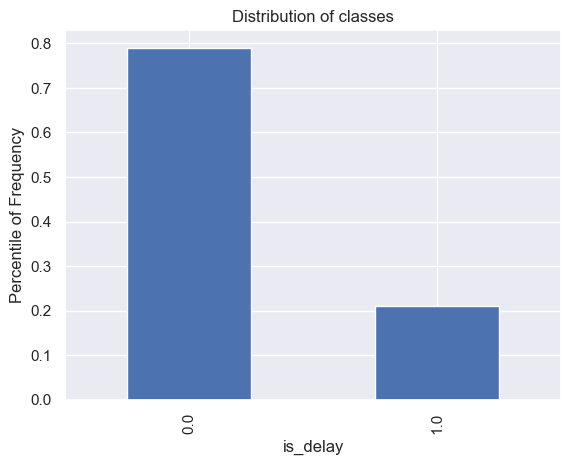

In [40]:
(df_master.groupby(['is_delay']).size()/len(df_master)).plot(kind='bar')# Enter your code here
plt.ylabel('Percentile of Frequency')
plt.title('Distribution of classes')
plt.show()

<AxesSubplot:xlabel='is_delay'>

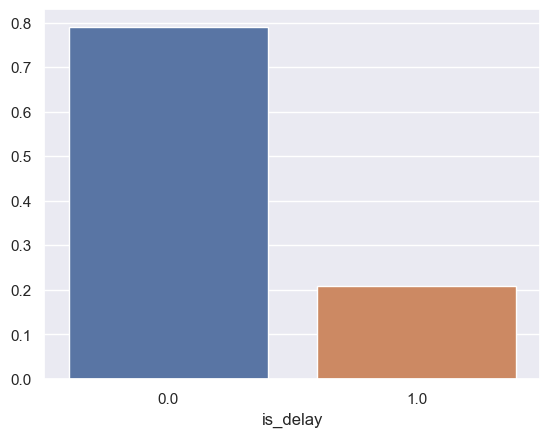

In [41]:
# or Plotting using Seaborn 
result = df_master.groupby(['is_delay']).size()/len(df_master)
 
# plot the result
sns.barplot(x = result.index, y = result.values)

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The labeled target variable is imblanced dataset consisting of about 80% delayed flight and around 20% non-delayed flightssince the majority of flights were not delayed. 10-fold cross-validation was used to resolve this problem

**Questions**: 

- Which months have the most delays? June
- What time of the day has the most delays? 20:00
- What day of the week has the most delays? Thursday
- Which airline has the most delays? WN
- Which origin and destination airports have the most delays? ORD for origin airports, and SFO for destination airports
- Is flight distance a factor in the delays? No, they have similar distribution in distance.

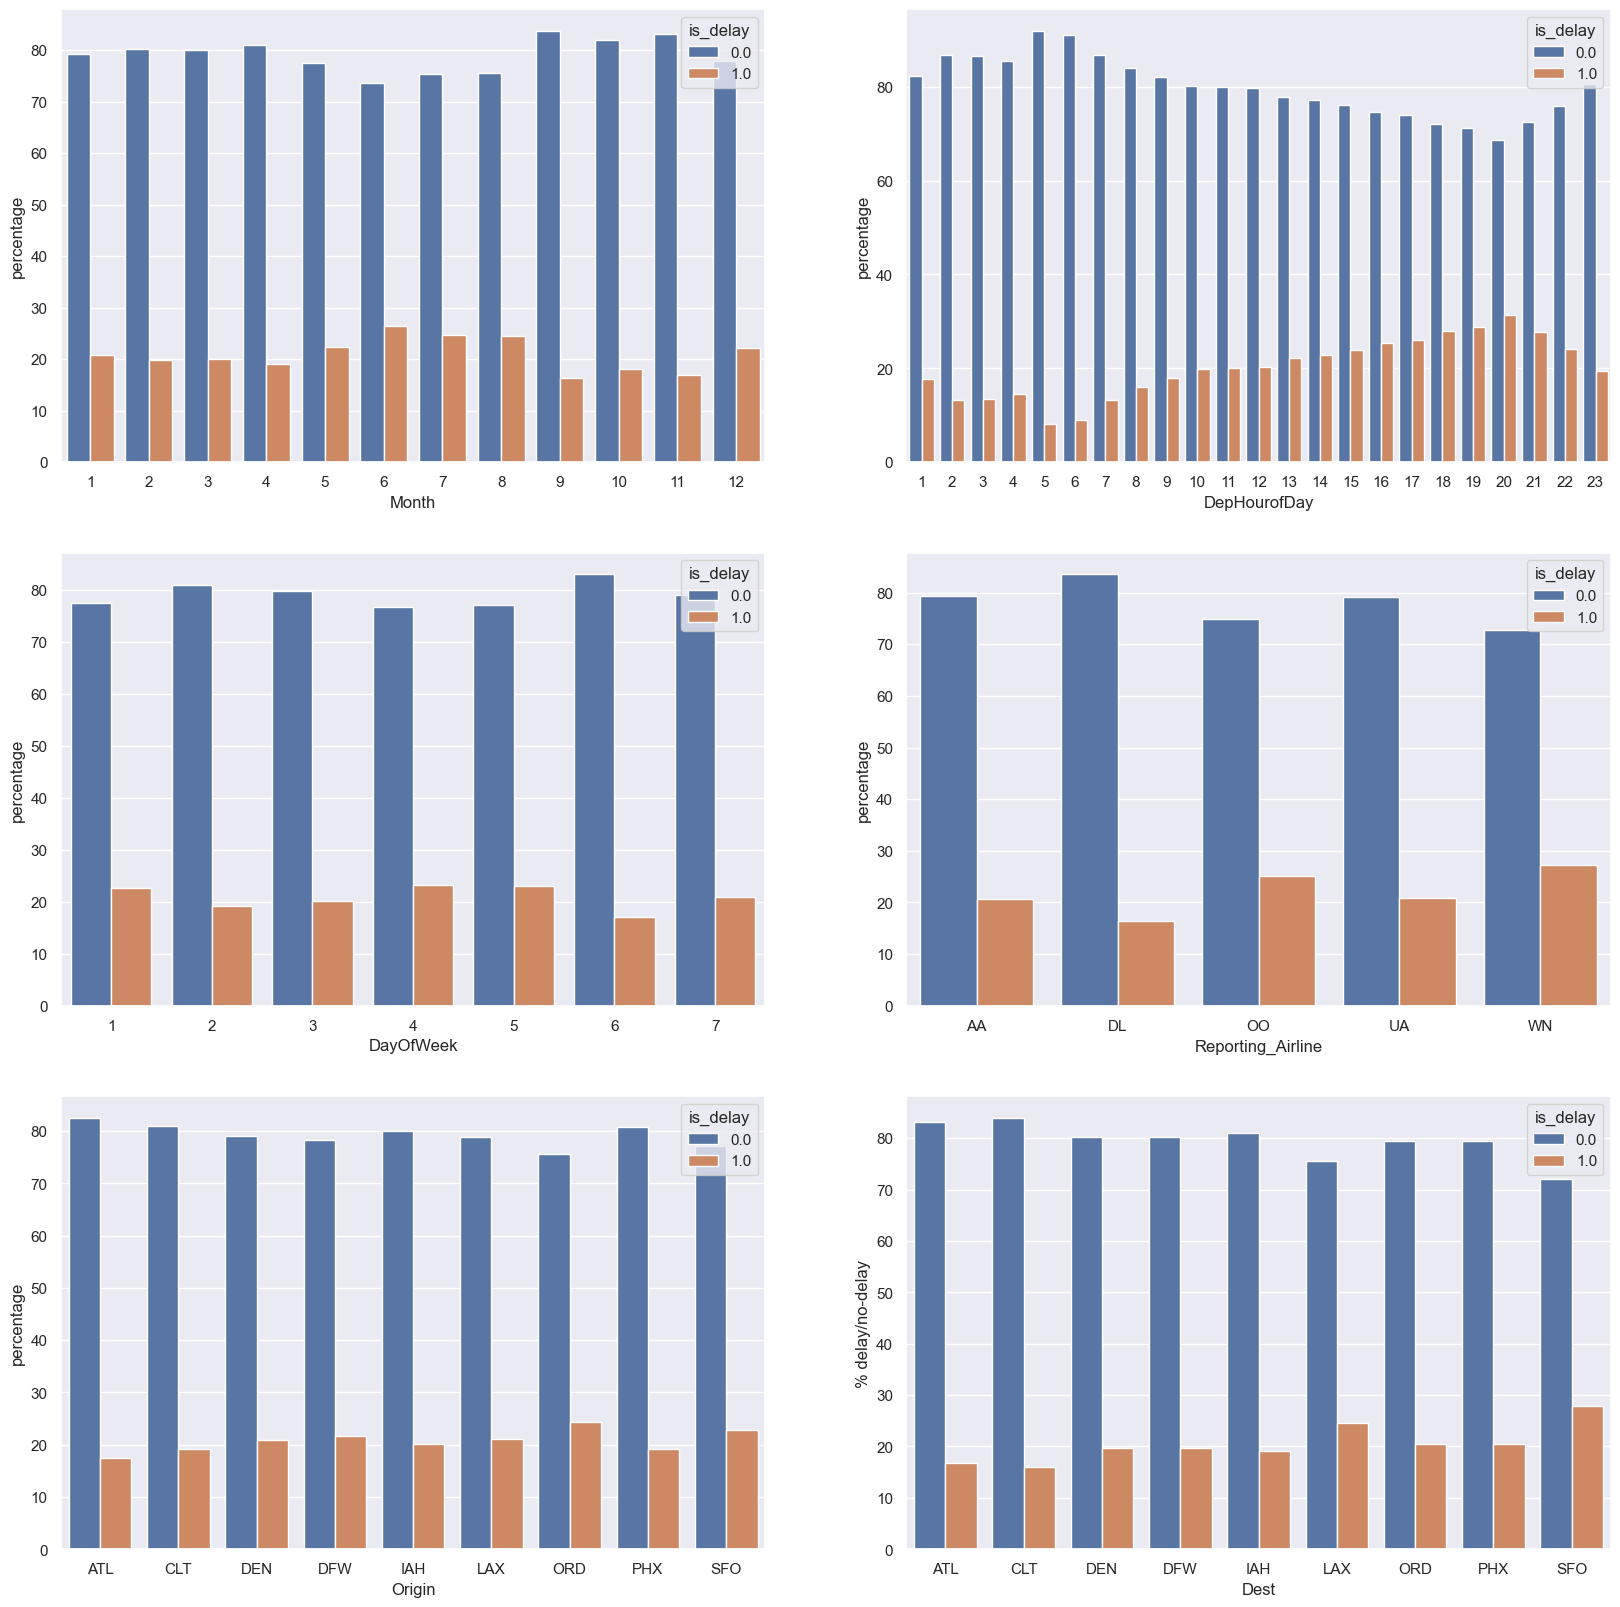

In [48]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = df_master.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

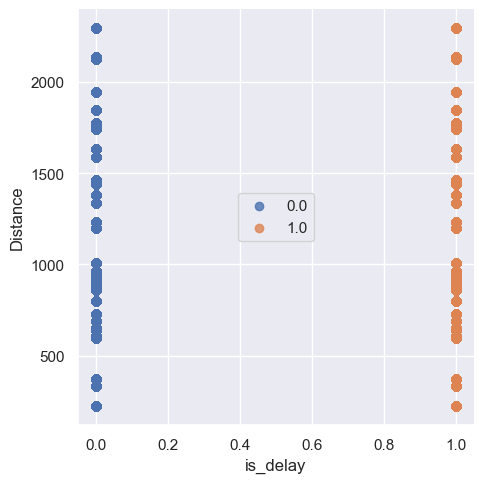

In [49]:
sns.lmplot( x="is_delay", y="Distance", data=df_master, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

# Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown
- Which months have the most delays?
June
- What time of the day has the most delays? 
20:00
- What day of the week has the most delays?
Thursday
- Which airline has the most delays?
WN
- Which origin and destination airports have the most delays? 
ORD for origin airports, and SFO for destination airports
- Is flight distance a factor in the delays? 
No, they have similar distribution in distance.

### Features

Look at all the columns and what their specific types are.

In [50]:
df_master.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [51]:
df_master.dtypes

Year                          int64
Quarter                       int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
FlightDate                   object
Reporting_Airline            object
Origin                       object
OriginState                  object
Dest                         object
DestState                    object
CRSDepTime           datetime64[ns]
Cancelled                   float64
Diverted                    float64
Distance                    float64
DistanceGroup                 int64
ArrDelay                    float64
ArrDelayMinutes             float64
is_delay                    float64
AirTime                     float64
DepHourofDay                  int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.
?
bins = [0, 4, 8, 12, 16, 20, 24]
labels = bins

df1['binned'] = pd.cut(df1['DepHourofDay'], bins, labels=labels)
print (df1)

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [48]:
df_master_orig = df_master.copy()

In [49]:
# Filtering the required columns:
df_master_orig = df_master_orig[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
# categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
#        'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest']
for c in categorical_columns:
    df_master_orig[c] = df_master_orig[c].astype('category')# Enter your code here
    

In [50]:
df_master_orig

is_delay Quarter Month DayofMonth DayOfWeek Reporting_Airline Origin  \
1086        0.0       1     1         26         7                DL    ATL   
1097        0.0       1     1         26         7                DL    DFW   
1114        0.0       1     1         26         7                DL    ATL   
1122        0.0       1     1         26         7                DL    ATL   
1126        0.0       1     1         26         7                DL    PHX   
...         ...     ...   ...        ...       ...               ...    ...   
17898       0.0       3     9         11         2                WN    DEN   
17916       0.0       3     9         11         2                WN    DEN   
17917       1.0       3     9         11         2                WN    DEN   
17918       0.0       3     9         11         2                WN    DEN   
17919       0.0       3     9         11         2                WN    DEN   

      Dest  Distance  DepHourofDay  
1086   IAH     689.0            21  
1097   ATL     731.0             9  
1114   DEN    1199.0            18  
1122   PHX    1587.0            16  
1126   ATL    1587.0             7  
...    ...       ...           ...  
17898  PHX     602.0            11  
17916  SFO     967.0             8  
17917  SFO     967.0            12  
17918  SFO     967.0            22  
17919  SFO     967.0            16  

[1635590 rows x 10 columns]

In [44]:
bins =  [0, 4, 8, 12, 16, 20, 24] 
labels = [4, 8, 12, 16, 20, 24]

df_master_orig['DepHourofDay'] = pd.cut(df_master_orig['DepHourofDay'], bins, labels=labels)
df_master_orig.DepHourofDay.unique()

[24, 12, 20, 16, 8, 4]
Categories (6, int64): [4 < 8 < 12 < 16 < 20 < 24]

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [51]:
df_master_orig_dummies = pd.get_dummies(df_master_orig[categorical_columns], drop_first=True) 

df_master_orig = pd.concat([df_master_orig, df_master_orig_dummies], axis = 1)
df_master_orig.drop(categorical_columns,axis=1, inplace=True)



In [52]:
df_master_orig.columns.tolist()

['is_delay',
 'Distance',
 'DepHourofDay',
 'Quarter_2',
 'Quarter_3',
 'Quarter_4',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'DayofMonth_2',
 'DayofMonth_3',
 'DayofMonth_4',
 'DayofMonth_5',
 'DayofMonth_6',
 'DayofMonth_7',
 'DayofMonth_8',
 'DayofMonth_9',
 'DayofMonth_10',
 'DayofMonth_11',
 'DayofMonth_12',
 'DayofMonth_13',
 'DayofMonth_14',
 'DayofMonth_15',
 'DayofMonth_16',
 'DayofMonth_17',
 'DayofMonth_18',
 'DayofMonth_19',
 'DayofMonth_20',
 'DayofMonth_21',
 'DayofMonth_22',
 'DayofMonth_23',
 'DayofMonth_24',
 'DayofMonth_25',
 'DayofMonth_26',
 'DayofMonth_27',
 'DayofMonth_28',
 'DayofMonth_29',
 'DayofMonth_30',
 'DayofMonth_31',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'Reporting_Airline_DL',
 'Reporting_Airline_OO',
 'Reporting_Airline_UA',
 'Reporting_Airline_WN',
 'Origin_CLT',
 'Origin_DEN',
 'Origin_DFW',
 'Origi

Check the length of the dataset and the new columnms.

In [53]:
# Enter your code here
df_master_orig.shape

(1635590, 73)

In [54]:
# Enter your code here
df_master_orig.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [55]:
df_master_orig.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [56]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
df_master_orig.to_csv('combined_csv_v1.csv',index=False) 
combined_csv_v1 = pd.read_csv('combined_csv_v1.csv')
combined_csv_v1.shape

(1635590, 73)

In [57]:
combined_csv_v1.columns

Index(['target', 'Distance', 'DepHourofDay', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT',

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [58]:
# Declare source and target variables

X_lgr = combined_csv_v1.drop(['target'],axis=1)#drop the target class from train set
y_lgr = combined_csv_v1['target'] #seperating out the target class
# Split X and y into training and testing datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_lgr,y_lgr,test_size=0.2,random_state=0,shuffle=True)

In [59]:
print('The size of training dataset x (input features) is:', X_train.shape)
print('The size of testing dataset x (input features) is:',X_test.shape)
print('The size of training dataset y (output features) is:', y_train.shape)
print('The size of testing dataset y (output features) is:',y_test.shape)

The size of training dataset x (input features) is: (1308472, 72)
The size of testing dataset x (input features) is: (327118, 72)
The size of training dataset y (output features) is: (1308472,)
The size of testing dataset y (output features) is: (327118,)


### Baseline classification model

In [60]:

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [61]:
# Predict results
y_pred= logreg.predict(X_test)

y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("Precision:{0:0.4f}".format(metrics.precision_score(y_test, y_pred, average = 'weighted')))
print("Recall:{0:0.4f}".format(metrics.recall_score(y_test, y_pred, average = 'weighted')))
print("F1-score:{0:0.4f}".format(metrics.f1_score(y_test, y_pred, average = 'weighted')))

Model accuracy score: 0.7894
Precision:0.7259
Recall:0.7894
F1-score:0.6973


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

Model accuracy score: 0.7894


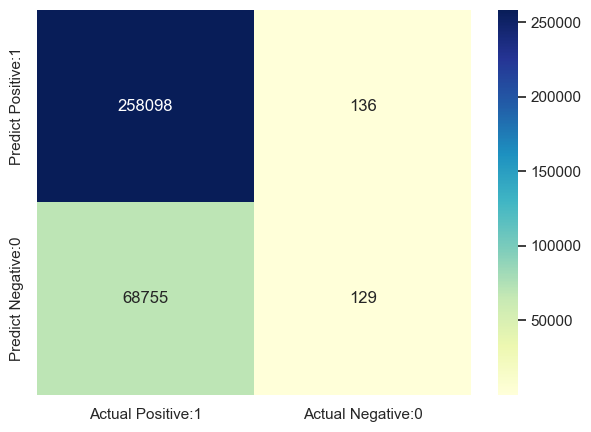

In [63]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(test_labels, target_predicted):
    # complete the code here
    mat = confusion_matrix(test_labels, target_predicted)

    plt.figure(figsize=(7,5))

    cm_matrix = pd.DataFrame(data=mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

    
plot_confusion_matrix(y_test, y_pred)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

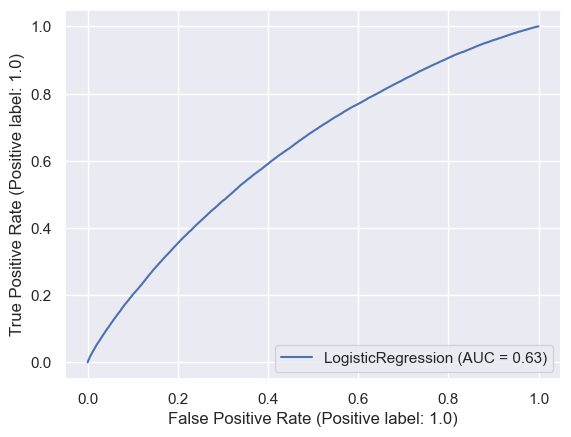

In [64]:
import matplotlib.pyplot as plt
def plot_roc(logreg, X_test, y_test):
    metrics.plot_roc_curve(logreg, X_test, y_test)
    plt.show()
    
plot_roc(logreg, X_test, y_test)

In [65]:
# Enter you code here
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

Confusion matrix

 [[258098    136]
 [ 68755    129]]
True positive =  258098
False positive =  136
False negative =  68755
True negative =  129


In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.7894979793224464
Precision: 0.7384790853280333
Recall: 0.7894979793224464
F1-score: 0.6974090088221074


In [66]:
# Prepare for Cross-validation to handle with imbalanced target varibale.
X = combined_csv_v1.drop(['target'],axis=1)#drop the target class from train set
y = combined_csv_v1['target'] #seperating out the target class
# Split X and y into training and testing datasets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=0,shuffle=True)
lgr = LogisticRegression(solver='liblinear', random_state=0)


In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lgr, X, y, cv=10)
scores

array([0.78991679, 0.79002684, 0.78615668, 0.78994736, 0.78969057,
       0.78973948, 0.78983119, 0.7895744 , 0.79006352, 0.79015523])

In [68]:
print("After 10 fold Craoss validation %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

After 10 fold Craoss validation 0.79 accuracy with a standard deviation of 0.00


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


“true positive” for correctly predicted event values is 258112. Number of not delay labelled as not delay.
“false positive” for incorrectly predicted event values is 122. Number of not delay labelled as delayed
“true negative” for correctly predicted no-event values is 147. Number of delayed labelled as delayed.
“false negative” for incorrectly predicted no-event values is 68737. Number of delayed labelled as not delay.


* True positive =  258112
* False positive =  122
* False negative =  68737
* True negative =  147


# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


### Provide a link for your Gitlab repository here
https://gitlab.com/Melissssaaaa/u3226961_liu_finalproject/-/blob/a0738bc90a84399b2e5895a52224290244761feb/onpremisesV1.ipynb

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [69]:
df_master_orig = df_master.copy()

In [70]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18
len(holidays)
### Add indicator variable for holidays

# df_master_orig['is_holiday'] = # Enter your code here 

52

In [71]:
def matchHolidays(row):
    result = []
    for date in row['FlightDate']:
        if date in holidays :
            result.append(1)
        else:
            result.append(0)

    return result

matchHolidays(df_master_orig)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [72]:
df_master_orig['FlightDate'].shape

(1635590,)

In [73]:
df_master_orig['is_holiday'] = matchHolidays(df_master_orig)

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [152]:
# download data from the link above and place it into the data folder


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [74]:
weather = pd.read_csv('daily-summaries-2022-10-25T19-35-12.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']


# Creating a dictionary of airports
station_map = dict(zip(station, airports))
print(station_map)


{'USW00023174': 'LAX', 'USW00012960': 'IAH', 'USW00003017': 'DEN', 'USW00094846': 'ORD', 'USW00013874': 'ATL', 'USW00023234': 'SFO', 'USW00003927': 'DFW', 'USW00023183': 'PHX', 'USW00013881': 'CLT'}


In [75]:
### Map weather stations to airport code
# Applying a dictionary to the map method

weather['airport'] = weather['STATION'].map(station_map)
weather['airport'].shape == weather['STATION'].shape

True

In [76]:
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport  
0     LAX  
1     LAX  
2     LAX  
3     LAX  
4     LAX

Create another column called `MONTH` from the `DATE` column.

In [77]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

In [78]:
weather['MONTH'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [79]:
weather1 = weather
weather1.SNOW.fillna(0, inplace=True)# 
weather1.SNWD.fillna(0, inplace=True)# 
weather1.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [80]:
idx = np.array([i for i in range(len(weather1))])
idx

array([    0,     1,     2, ..., 16431, 16432, 16433])

In [81]:
idx = np.array([i for i in range(len(weather1))])
TAVG_idx = np.where(weather1['TAVG'].isna())
TMAX_idx = np.where(weather1['TMAX'].isna())
TMIN_idx = np.where(weather1['TMIN'].isna())
TAVG_idx


(array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
         3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
         3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
         3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
         4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
         4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
         4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420],
       dtype=int64),)

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [82]:
weather_impute = weather1.groupby(['STATION','MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head()


STATION MONTH        TAVG        TMAX       TMIN
0  USW00003017    01   -2.741935   74.000000 -69.858065
1  USW00003017    02   11.219858   88.553191 -65.035461
2  USW00003017    03   64.722581  146.858065 -17.070968
3  USW00003017    04   91.200000  167.440000  14.246667
4  USW00003017    05  132.580645  206.496774  65.283871

Merge the mean data with the weather data.

In [83]:
### get the yesterday's data
weather1 = pd.merge(weather1, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})


Check for missing values again.

In [84]:
# weather1.TAVG[TAVG_idx] = weather1.TAVG_AVG[TAVG_idx]
for i in TAVG_idx:
    weather1.TAVG[i] = weather1.TAVG_AVG[i]
    
for i in TMAX_idx:
    weather1.TMAX[i] = weather1.TMAX_AVG[i]
    
for i in TMIN_idx :    
    weather1.TMIN[i] = weather1.TMIN_AVG[i]

weather1.isna().sum()


STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [85]:
weather1.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [86]:
### Add origin weather conditions

data_orig = df_master_orig.copy()
data_orig = pd.merge(data_orig, weather1,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather1,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])



**Note**: It is always a good practice to check nulls/NAs after joins.

In [87]:
sum(data_orig.isna().any())

0

In [88]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

In [121]:
# transform to csv file for Tableau
data_orig.to_csv('combinedv2.csv', index=False)

Convert the categorical data into numerical data using one-hot encoding.

In [89]:
data = data_orig.copy()
# data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
#        'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
#        'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


In [90]:
data = data[['is_delay', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]

In [91]:
# categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
#        'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
# for c in categorical_columns:
#     data[c] = data[c].astype('category')

KeyError: 'Quarter'

In [93]:
categorical_columns  = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [94]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data_dummies.columns

Index(['Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2',
       'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6',
       'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10',
       'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14',
       'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18',
       'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22',
       'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26',
       'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30',
       'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL',
       'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN',
       'Origin_CLT', 'Origin_DEN', 'Origin_DF

In [95]:
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)


### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [96]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4',
       'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8',
       'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12',
       'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16',
       'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20',
       'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24',
       'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28',
       'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Reporting_Air

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [97]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [98]:
data.target

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1635585    0.0
1635586    0.0
1635587    1.0
1635588    0.0
1635589    0.0
Name: target, Length: 1635590, dtype: float64

In [99]:
data.shape

(1635590, 83)

In [100]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
data.to_csv('combined_csv_v2.csv', index=False)

Create the training and testing sets again.

In [101]:
combined_csv_v2 = pd.read_csv('combined_csv_v2.csv')

In [102]:
# Enter your code here
combined_csv_v2 = pd.read_csv('combined_csv_v2.csv')
# Declare source and target variables

X_lgr_v2 = combined_csv_v2.drop(['target'],axis=1)#drop the target class from train set
y_lgr_v2 = combined_csv_v2['target']

# Split X and y into training and testing datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_lgr_v2,y_lgr_v2,test_size=0.2,random_state=0,shuffle=True)

### New baseline classifier

Now, see if these new features add any predictive power to the model.
Refelection

In [103]:
# Instantiate another logistic regression model
# classifier2 = # Enter your code here
# <write code here>
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg2 = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg2.fit(X_train, y_train)

# Predict results
y_pred= logreg2.predict(X_test)

y_pred

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7920


In [104]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:", metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score: 0.7920108340109685
Precision: 0.7472527760692318
Recall: 0.7920108340109685
F1-score: 0.7183368949807917


In [106]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(logreg2, X_lgr_v2, y_lgr_v2, cv=10)
scores2

print("After 10 fold Craoss validation %0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

After 10 fold Craoss validation 0.79 accuracy with a standard deviation of 0.00


In [107]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

start = time.time()


modelDT = DecisionTreeClassifier()


X = combined_csv_v2.drop(['target'],axis=1)#drop the target class from train set
y = combined_csv_v2['target']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# fit and evaluate models
# modelLR.fit(X_train, y_train)

# y_predLR = modelLR.predict(X_test)

print(f'define models in {round((time.time() - start)/60,2)} minutes')

define models in 0.04 minutes


In [108]:
start = time.time()
modelDT.fit(X_train, y_train)
# modelSVM.fit(X_train, y_train)
print(f'fit models in {round((time.time() - start)/60,2)} minutes')

fit models in 0.62 minutes


In [109]:
start = time.time()
y_predDT = modelDT.predict(X_test)
# y_predSVM = modelSVM.predict(X_test)
print(f'predict models in {round((time.time() - start)/60,2)} minutes')

predict models in 0.01 minutes


In [110]:
from sklearn.metrics import accuracy_score

# print('Model LogisticRegression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predLR)))
print('Model DecisionTreeClassifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predDT)))


Model DecisionTreeClassifier accuracy score: 0.7394


In [111]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:", metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score: 0.7920108340109685
Precision: 0.7472527760692318
Recall: 0.7920108340109685
F1-score: 0.7183368949807917


In [112]:
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(modelDT, X, y, cv=10)
scores3

print("After 10 fold Craoss validation %0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

After 10 fold Craoss validation 0.61 accuracy with a standard deviation of 0.08


In [113]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(random_state=13)
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

In [114]:
y_predRF = modelRF.predict(X_test)
modelRF.score(X_test, y_test)

0.7950311508385354

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?


The accuracy of second model with extra dataset increased from 0.7895 in model 1
to 0.7950.

### Let's test unseen data

In [115]:
combined_csv_v2.head()

target  Distance  DepHourofDay  AWND_O  PRCP_O  TAVG_O  AWND_D  PRCP_D  \
0     0.0     689.0            21      33       0    54.0      30       0   
1     0.0     731.0             9      39       0   136.0      33       0   
2     0.0    1199.0            18      33       0    54.0      77       0   
3     0.0    1587.0            16      33       0    54.0      20       0   
4     0.0    1587.0             7      20       0   165.0      33       0   

   TAVG_D  SNOW_O  ...  Origin_SFO  Dest_CLT  Dest_DEN  Dest_DFW  Dest_IAH  \
0   130.0     0.0  ...           0         0         0         0         1   
1    54.0     0.0  ...           0         0         0         0         0   
2    68.0     0.0  ...           0         0         1         0         0   
3   165.0     0.0  ...           0         0         0         0         0   
4    54.0     0.0  ...           0         0         0         0         0   

   Dest_LAX  Dest_ORD  Dest_PHX  Dest_SFO  is_holiday_1  
0         0         0         0         0             0  
1         0         0         0         0             0  
2         0         0         0         0             0  
3         0         0         1         0             0  
4         0         0         0         0             0  

[5 rows x 83 columns]

In [120]:
combined_csv_v2.columns

Index(['target', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4',
       'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8',
       'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12',
       'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16',
       'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20',
       'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24',
       'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28',
       'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Reporting_Airli

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [ ]:
# copy the link here


## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1.Does your model performance meet your business goal?
* The comparative analysis of three different airline delay prediction approaches using Logistical Regression, Random Forset and Decision Tree conducted in this project.
* I have approved the hypothesis that data augementation will improve accuracy in Machine Learning approach. It performs best when combined with the Random Forest Classifier learning and accuracy has achieved at 79.50%.

2. Model improvement
* Data augmentation, feature selection.
* Different model classifer, the Random Forest and Decision Tree Classifier


3. Big Chanllenge
*  Machine learning classifiers applied like Support Vector Machine(SVM) cannot be load and computing as the Ram limit reason.


4. three importants things learned in this project.
* Clssifer selection: the comparisation model evaluation conducted in this project, It performs best when combined with the Random Forest Classifier learning and accuracy has achieved at 79.50%.
* Model evaluation method:  accuracy, F1-score or ROC-AUC. Our problem is balanced, but delayed airlines are not equally as not delayed airelines, as  the F1 score is balancing precision and recall on the positive class, so the F1 score will  be used for evaluation.
* Optimization: hyperparameter tuning, hyper-parameters are parameters that are not learned directly by estimators. They are supplied as adjustable parameters to the constructor of estimator classes in scikit-learn.
    